In [1]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
#import pickle

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

In [2]:
#data = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')
data = pd.read_csv('./data/games_sales_clean.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


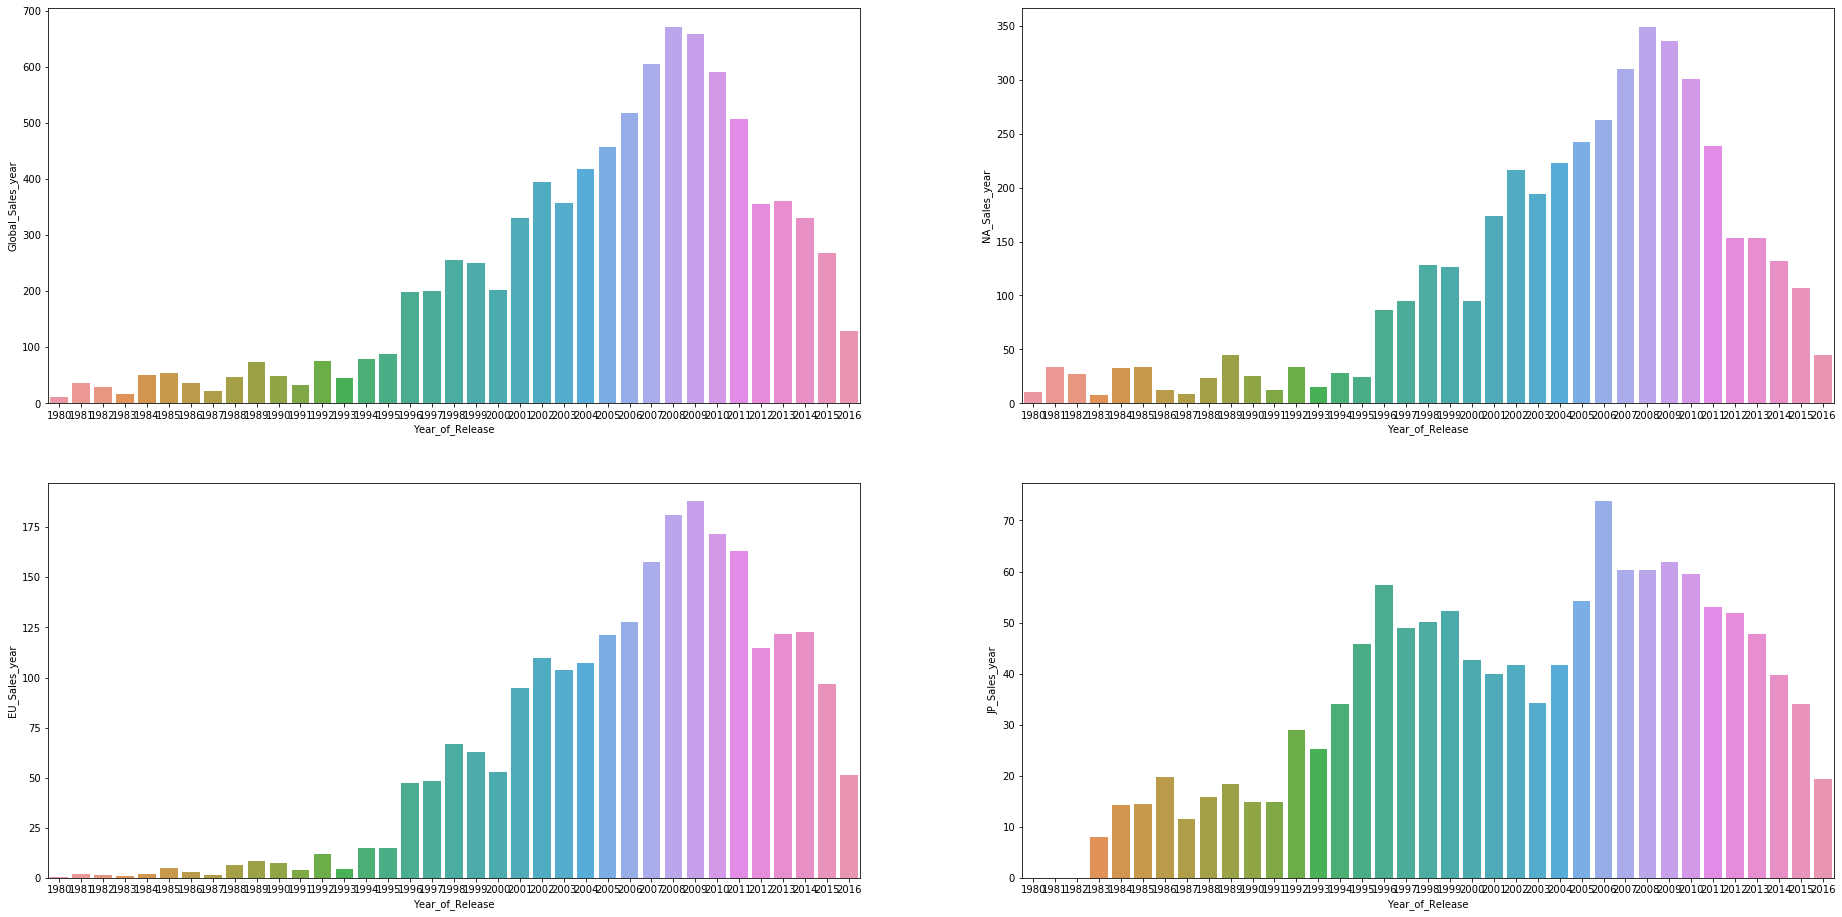

In [4]:
# sales figures over the years - Inflation not taken into account
sales_data = data.groupby(['Year_of_Release'])['Global_Sales'].agg(Global_Sales_year='sum')
NA_sales_data = data.groupby(['Year_of_Release'])['NA_Sales'].agg(NA_Sales_year='sum')
EU_sales_data = data.groupby(['Year_of_Release'])['EU_Sales'].agg(EU_Sales_year='sum')
JP_sales_data = data.groupby(['Year_of_Release'])['JP_Sales'].agg(JP_Sales_year='sum')

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.barplot(x=sales_data.index, y=sales_data['Global_Sales_year'])
plt.subplot(2,2,2)
sns.barplot(x=NA_sales_data.index, y=NA_sales_data['NA_Sales_year'])
plt.subplot(2,2,3)
sns.barplot(x=EU_sales_data.index, y=EU_sales_data['EU_Sales_year'])
plt.subplot(2,2,4)
sns.barplot(x=JP_sales_data.index, y=JP_sales_data['JP_Sales_year'])

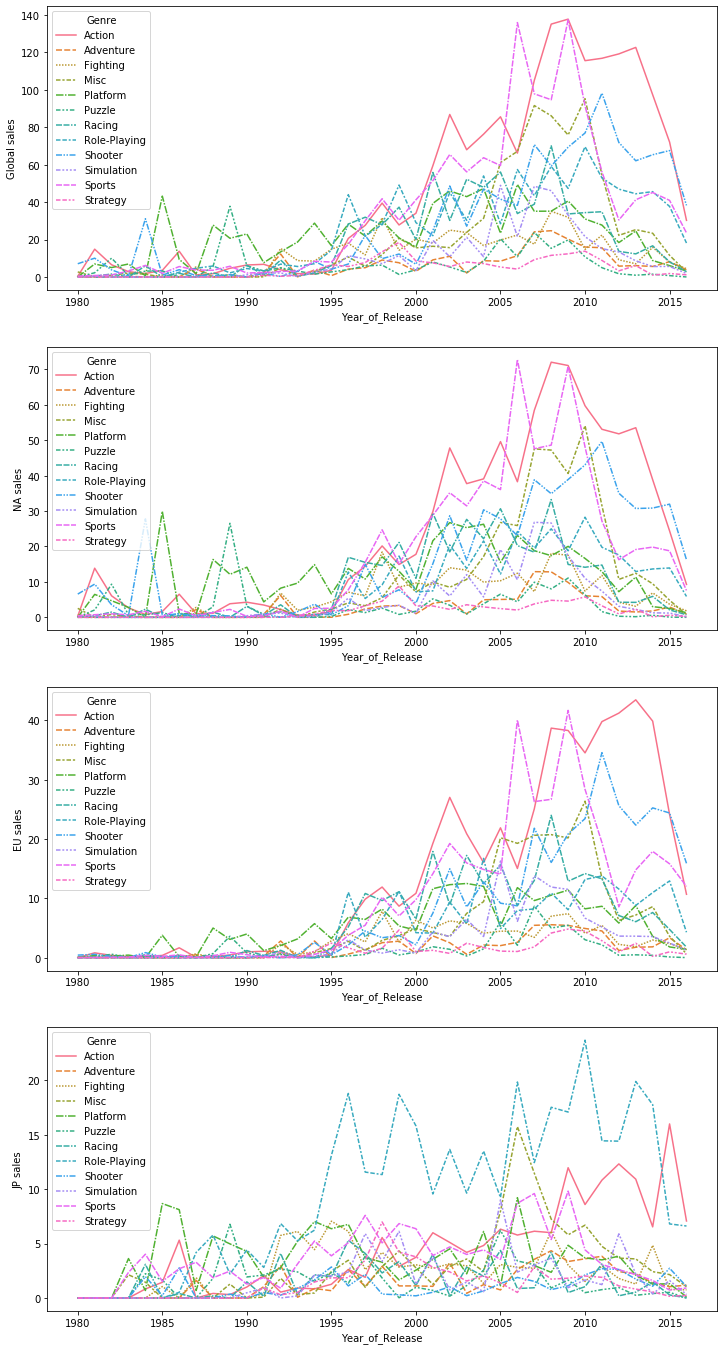

In [16]:
# sales figures per year and genre (Global, NA, EU and JP)
genre_data = data.groupby(['Year_of_Release','Genre'])['Global_Sales'].agg(Global_Sales_year='sum')
NA_genre_data = data.groupby(['Year_of_Release','Genre'])['NA_Sales'].agg(NA_Sales_year='sum')
EU_genre_data = data.groupby(['Year_of_Release','Genre'])['EU_Sales'].agg(EU_Sales_year='sum')
JP_genre_data = data.groupby(['Year_of_Release','Genre'])['JP_Sales'].agg(JP_Sales_year='sum')

#reshapes the table so the second index becomes the columns instead
genre_data = genre_data.reset_index().pivot(columns='Genre',index='Year_of_Release',values='Global_Sales_year').fillna(0)
NA_genre_data = NA_genre_data.reset_index().pivot(columns='Genre',index='Year_of_Release',values='NA_Sales_year').fillna(0)
EU_genre_data = EU_genre_data.reset_index().pivot(columns='Genre',index='Year_of_Release',values='EU_Sales_year').fillna(0)
JP_genre_data = JP_genre_data.reset_index().pivot(columns='Genre',index='Year_of_Release',values='JP_Sales_year').fillna(0)

plt.figure(figsize=(12,6*4))
plt.subplot(4,1,1)
sns.lineplot(data=genre_data)
plt.ylabel('Global sales')
plt.subplot(4,1,2)
sns.lineplot(data=NA_genre_data)
plt.ylabel('NA sales')
plt.subplot(4,1,3)
sns.lineplot(data=EU_genre_data)
plt.ylabel('EU sales')
plt.subplot(4,1,4)
sns.lineplot(data=JP_genre_data)
plt.ylabel('JP sales')
plt.show()

To better compare the data over the years we take a look at the realtive sales, i.e. the market share of every genre on the total sales per year.

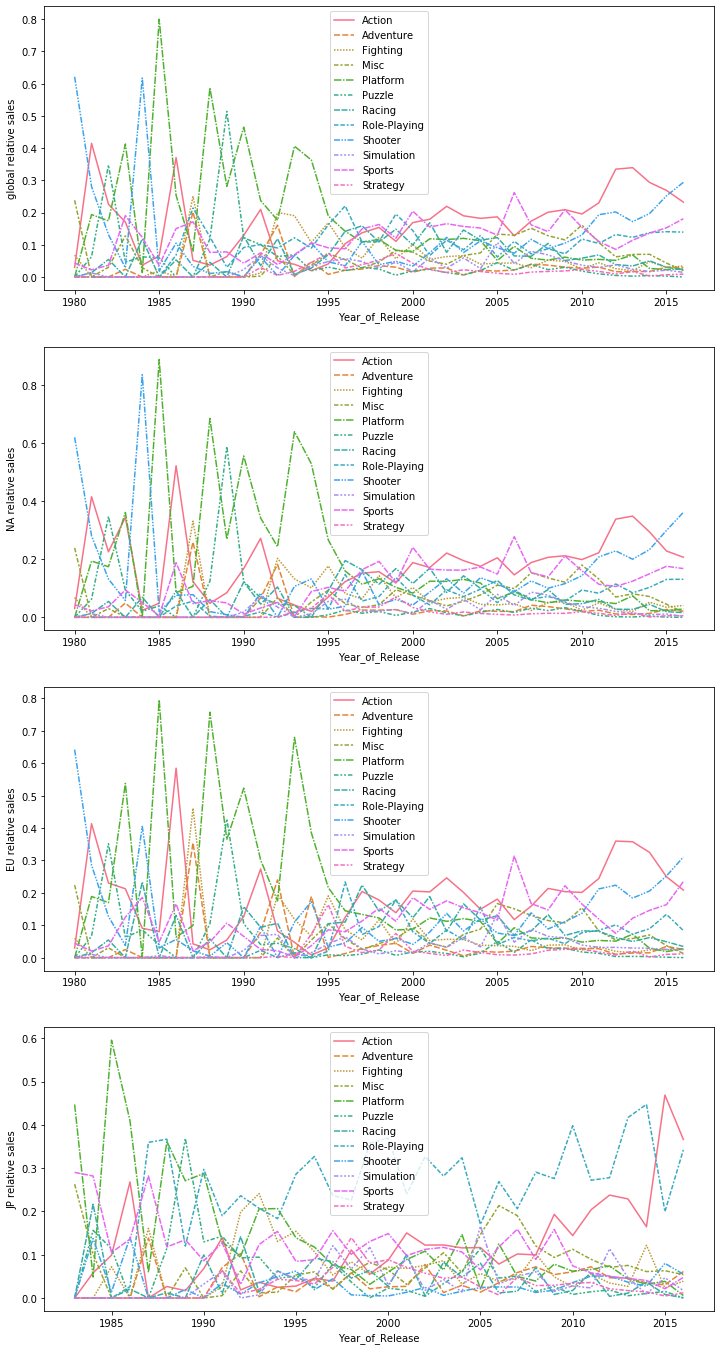

In [17]:
# relative sales figures per genre and year (Global, NA, EU, JP)
genre_rel = pd.concat([genre_data, sales_data], axis=1,sort=False)
genre_rel = genre_rel.div(genre_rel['Global_Sales_year'], axis=0).drop(columns='Global_Sales_year')
NA_genre_rel = pd.concat([NA_genre_data, NA_sales_data], axis=1,sort=False)
NA_genre_rel = NA_genre_rel.div(NA_genre_rel['NA_Sales_year'], axis=0).drop(columns='NA_Sales_year')
EU_genre_rel = pd.concat([EU_genre_data, EU_sales_data], axis=1,sort=False)
EU_genre_rel = EU_genre_rel.div(EU_genre_rel['EU_Sales_year'], axis=0).drop(columns='EU_Sales_year')
JP_genre_rel = pd.concat([JP_genre_data, JP_sales_data], axis=1,sort=False)
JP_genre_rel = JP_genre_rel.div(JP_genre_rel['JP_Sales_year'], axis=0).drop(columns='JP_Sales_year')

# plot the results 
plt.figure(figsize=(12,6*4))

plt.subplot(4,1,1)
sns.lineplot(data=genre_rel)
plt.ylabel('global relative sales')
plt.subplot(4,1,2)
sns.lineplot(data=NA_genre_rel)
plt.ylabel('NA relative sales')
plt.subplot(4,1,3)
sns.lineplot(data=EU_genre_rel)
plt.ylabel('EU relative sales')
plt.subplot(4,1,4)
sns.lineplot(data=JP_genre_rel)
plt.ylabel('JP relative sales')
plt.show()

Obviously the landscape of videogame genres changed drastically in the years '90. For regression and further analysis we limit ourselfs to the more recent years, i.e. the years 2000-2016.

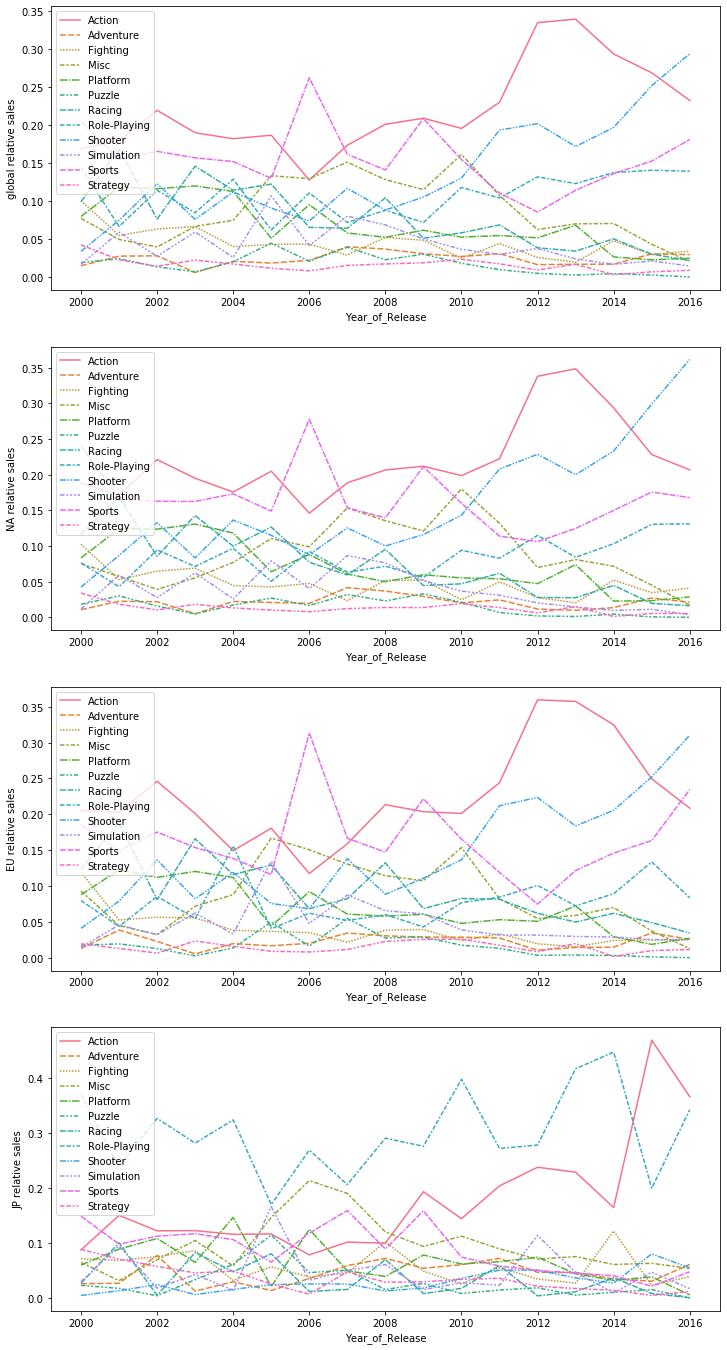

In [18]:
# drop all rows with release date before 2000 (Global, NA, EU, JP)
indizes = genre_rel[genre_rel.index<2000].index
genre_rel.drop(indizes, inplace=True)
indizes = NA_genre_rel[NA_genre_rel.index<2000].index
NA_genre_rel.drop(indizes, inplace=True)
indizes = EU_genre_rel[EU_genre_rel.index<2000].index
EU_genre_rel.drop(indizes, inplace=True)
indizes = JP_genre_rel[JP_genre_rel.index<2000].index
JP_genre_rel.drop(indizes, inplace=True)

# plot the results
plt.figure(figsize=(12,6*4))

plt.subplot(4,1,1)
sns.lineplot(data=genre_rel)
plt.ylabel('global relative sales')
plt.legend(loc=2)
plt.subplot(4,1,2)
sns.lineplot(data=NA_genre_rel)
plt.ylabel('NA relative sales')
plt.legend(loc=2)
plt.subplot(4,1,3)
sns.lineplot(data=EU_genre_rel)
plt.ylabel('EU relative sales')
plt.legend(loc=2)
plt.subplot(4,1,4)
sns.lineplot(data=JP_genre_rel)
plt.ylabel('JP relative sales')
plt.legend(loc=2)
plt.show()

We now have a look at the data in those last 16 years.

In [19]:
# # Prepare data so the sales are relative to the figures of the whole year
# data_rel = data.merge(sales_data, on=['Year_of_Release'])
# data_rel[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']] = data_rel[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].div(data_rel['Global_Sales_year'], axis=0)

# # drop all rows with release date before 2000
# indizes = data_rel[data_rel['Year_of_Release']<2000].index
# data_rel.drop(indizes, inplace=True)


# plt.figure(figsize=(16,8))
# plt.ylabel('relative sales')
# plt.xlabel('year of release')
# sns.scatterplot(x=data_rel['Year_of_Release'], y=data_rel['Global_Sales'], hue=data_rel['Genre'])

Wow, there is nothing to see....

In [20]:
#sns.swarmplot(x=data_rel['Genre'],y=data_rel['Global_Sales'])